In [28]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters. 


In [29]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.zeros(2)

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [30]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

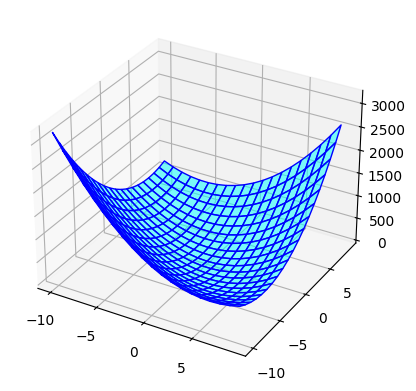

In [31]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

Parameters of ISTA

In [32]:
TOL_GRAD_NORM = 1e-4
MAX_ITER = 1e3
TOL_DIST_X = 1e-3
alpha = 0.05
# optimal value for alpha
alpha = 1 / np.max(np.linalg.eigvals(A.T@A))

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [33]:
x = np.array([-5, 10])

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]


In [34]:
def soft_thresholding(x, lmbda):
    return np.sign(x) * np.maximum(np.abs(x) - lmbda, 0)

Main loop

In [35]:
cnt = 0

while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    cnt += 1
    # compute the argument of the proximal operator
    x = x - alpha * df(x)

    # perform soft thresholding of x
    x = soft_thresholding(x, lmbda * alpha)

    # compute the norm of the gradient for the stopping criteria
    grad_norm = np.linalg.norm(df(x))

    # compute the distance between two consecutive iterates for the stopping criteria
    distanceX = np.linalg.norm(all_x[-1] - x)

    # store the estimate
    all_x.append(x)


Plot all the estimates

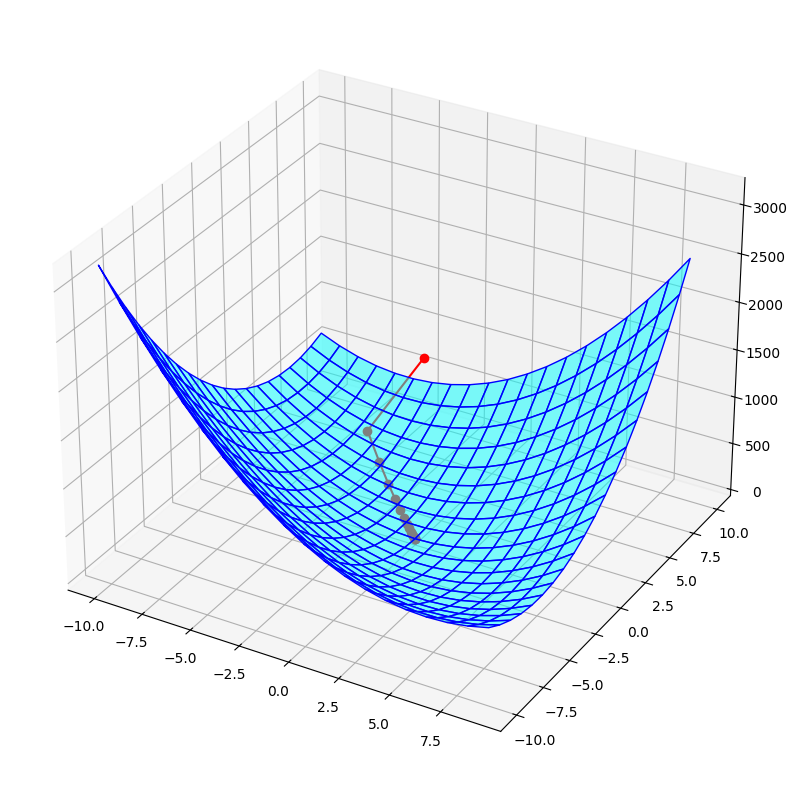

In [36]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = F(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [37]:
print(f'nr of iteration of ISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x[0]:.4f}, {x[1]:.4f}]\n')
print(f'Value of the functional: {f(x):.4f}\n')

nr of iteration of ISTA (before stopping criteria met): 16

Solution of ISTA: [0.0000, 0.0000]

Value of the functional: 0.0000

